In [253]:
import pandas as pd 
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [254]:
data = pd.read_csv("C:\\Users\\vishal\\Downloads\\adult.txt", sep = ",", header = None, names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','decision'], index_col = False)

In [255]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,decision
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [256]:
data.drop([0],axis=0,inplace=True)
data.head()
data.iloc[[1],[8]]

,race
2,White


In [257]:
var_list=(list(data.select_dtypes(exclude=["number","bool_"]).columns))
mode_list = []

In [258]:
def mode_func():
    for i in var_list:
        mode_list.append(data[i].mode())
        
mode_func()

In [259]:
mode_list=pd.Series(mode_list)

def replace_modes():
    for i,j in zip(var_list,mode_list):
        #print(" I : {}".format(i))
        #print(" J : {}".format(j))
        data.loc[data[i] == ' ?', i] = j[0]
        
replace_modes()

In [260]:
data['decision']=data['decision'].map(lambda x : 1 if x == ' >50K.' else 0)

In [261]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,decision
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,0


In [262]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [263]:
data['race'].unique()

array([' Black', ' White', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [264]:
data['workclass'] = labelencoder.fit_transform(data['workclass'])

In [266]:
encod = ['education','marital-status','relationship','occupation','race','sex']
for i in encod:
    data[i] = labelencoder.fit_transform(data[i])

In [265]:
data['native-country']=data['native-country'].map(lambda x : ' United-States' if x == ' United-States' else 'others')
data['race']=data['race'].map(lambda x : ' White' if x == ' White' else 'Other')

In [267]:
data['race']


1        1
2        0
3        0
4        1
5        0
        ..
16277    0
16278    1
16279    0
16280    1
16281    0
Name: race, Length: 16281, dtype: int32

In [268]:
data['native-country'] = labelencoder.fit_transform(data['native-country'])

In [269]:
data['education-num'] = labelencoder.fit_transform(data['education-num'])

In [270]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [272]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Logistic Regression 

In [273]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

C:\Users\vishal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [274]:
y_pred = model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

a = model.score(X_test, y_test)

Accuracy: 0.23941068139963168
Precision: 0.23941068139963168
Recall: 1.0


# Naive Bayes 

In [275]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

C:\Users\vishal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [276]:
print("Naive Bayes score: ",nb.score(X_test, y_test))
b = nb.score(X_test, y_test)

Naive Bayes score:  0.7851442602823818


# Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

c = 0.8551258440761204


C:\Users\vishal\AppData\Local\Temp\ipykernel_13156\1191364347.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


ACCURACY OF THE MODEL:  0.850828729281768


# Decision Tree  

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
print("Results Using Gini Index:")

clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

y_pred_gini = prediction(X_test, clf_gini)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print("Results Using Entropy:")
    
y_pred_entropy = prediction(X_test, clf_entropy)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
d = 0.8551258440761204

Results Using Gini Index:
Predicted values:
[0 1 0 ... 0 1 0]
ACCURACY OF THE MODEL:  0.850828729281768
Results Using Entropy:
Predicted values:
[0 1 0 ... 0 1 0]
ACCURACY OF THE MODEL:  0.850828729281768


# KNN

In [279]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
y_pred=knn.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
e = 0.7790055248618785

[0 0 0 ... 0 0 0]
ACCURACY OF THE MODEL:  0.7790055248618785


C:\Users\vishal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Accuracy Comparison

In [280]:
import matplotlib.pyplot as plt
algos = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'KNN']
vals = [a,b,c,d,e]

<BarContainer object of 5 artists>

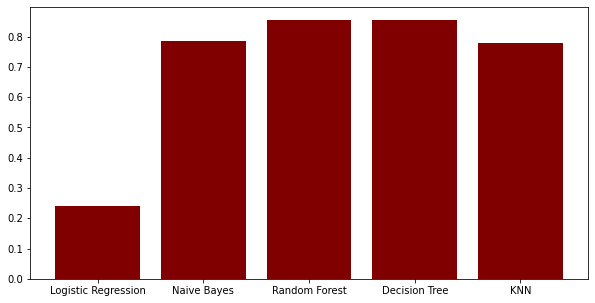

In [281]:
fig = plt.figure(figsize = (10, 5))
plt.bar(algos, vals, color='maroon')

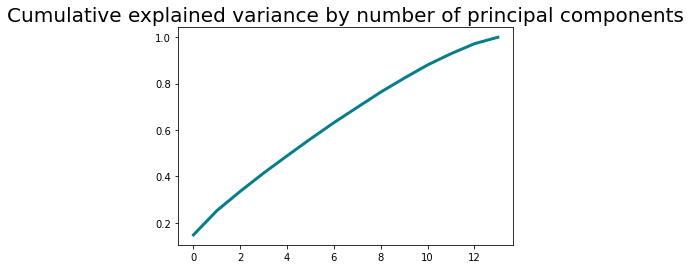

In [282]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [283]:
X_train = pd.DataFrame(X_train)
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.446504,0.153313,-0.216695,0.549996,-0.045009,0.192914,-0.125846,0.132434,-0.179712,-0.304529,-0.163136,0.427325,0.029847,0.141359
1,0.164111,0.014140,-0.215225,-0.010471,0.396623,0.106359,0.811621,0.082762,-0.253239,0.005520,-0.142698,-0.084432,-0.021186,-0.014267
2,-0.081718,0.121605,0.549238,-0.194862,-0.095827,-0.162263,0.030043,0.695846,-0.323308,-0.026929,0.027081,0.110418,-0.012286,-0.004800
3,0.151134,-0.698446,0.236545,0.029822,-0.085453,-0.112432,0.098195,-0.213130,-0.240665,-0.227599,0.142700,0.015595,0.476568,-0.010173
4,0.295583,-0.719311,0.232216,0.023711,0.046129,0.097999,-0.013075,-0.056484,-0.032222,-0.067996,0.046658,0.021207,-0.558887,0.071188


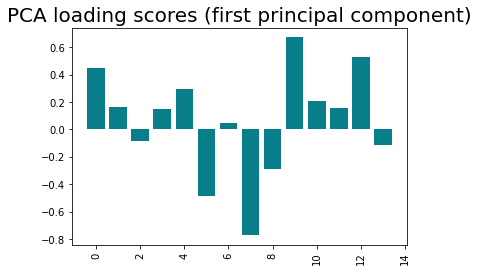

In [284]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [285]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

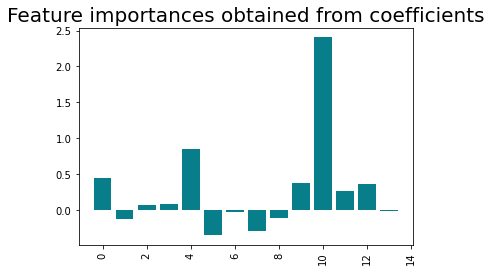

In [286]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Comparison Post PCA

In [287]:
drop_calls = ['workclass','fnlwgt','education','occupation','race','capital-loss']
data1 = pd.read_csv("C:\\Users\\vishal\\Downloads\\adult.txt", sep = ",", header = None, names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','decision'], index_col = False)
data1=data1.drop(drop_calls, axis=1)

In [288]:
var_list=(list(data1.select_dtypes(exclude=["number","bool_"]).columns))
mode_list = []
def mode_func():
    for i in var_list:
        mode_list.append(data1[i].mode())
        
mode_func()
mode_list=pd.Series(mode_list)

def replace_modes():
    for i,j in zip(var_list,mode_list):
        #print(" I : {}".format(i))
        #print(" J : {}".format(j))
        data1.loc[data1[i] == ' ?', i] = j[0]
        
replace_modes()

In [289]:
data1['decision']=data1['decision'].map(lambda x : 1 if x == ' >50K.' else 0)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
encod = ['marital-status','relationship','sex']
for i in encod:
    data1[i] = labelencoder.fit_transform(data1[i])
data1['native-country']=data1['native-country'].map(lambda x : ' United-States' if x == ' United-States' else 'others')
data1['native-country'] = labelencoder.fit_transform(data1['native-country'])
data1['education-num'] = labelencoder.fit_transform(data1['education-num'])

In [290]:
data1.drop([0], axis=0, inplace=True)

In [291]:
data1.head()

,age,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,decision
1,25,6,4,3,1,0.0,40.0,0,0
2,38,8,2,0,1,0.0,50.0,0,0
3,28,11,2,0,1,0.0,40.0,0,1
4,44,9,2,0,1,7688.0,40.0,0,1
5,18,9,4,3,0,0.0,30.0,0,0


In [292]:
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1:].values

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [294]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [295]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test)

C:\Users\vishal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [296]:
from sklearn import metrics
f = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.2430939226519337
Precision: 0.2430939226519337
Recall: 1.0


In [297]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes score: ",nb.score(x_test, y_test))
g = nb.score(x_test, y_test)

Naive Bayes score:  0.7955801104972375


C:\Users\vishal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [298]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
h = metrics.accuracy_score(y_test, y_pred)

C:\Users\vishal\AppData\Local\Temp\ipykernel_13156\3419083469.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


ACCURACY OF THE MODEL:  0.7188459177409454


In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [300]:
print("Results Using Gini Index:")

clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

y_pred_gini = prediction(X_test, clf_gini)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
i =  metrics.accuracy_score(y_test, y_pred)

print("Results Using Entropy:")
    
y_pred_entropy = prediction(X_test, clf_entropy)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]
ACCURACY OF THE MODEL:  0.7188459177409454
Results Using Entropy:
Predicted values:
[0 0 0 ... 0 0 0]
ACCURACY OF THE MODEL:  0.7188459177409454


In [301]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
y_pred=knn.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
j = metrics.accuracy_score(y_test, y_pred)

C:\Users\vishal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 1 0]
ACCURACY OF THE MODEL:  0.7268262737875998


<BarContainer object of 5 artists>

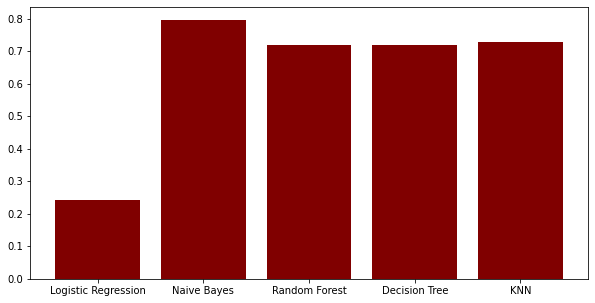

In [302]:
algos = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Decision Tree', 'KNN']
vals = [f,g,h,i,j]

fig = plt.figure(figsize = (10, 5))
plt.bar(algos, vals, color='maroon')

# Feature Reduction VS Original

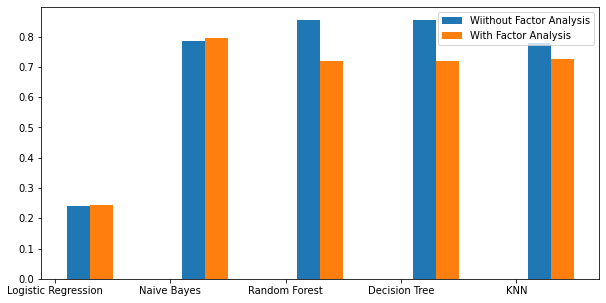

In [303]:
team = ['Logistic Regression','Naive Bayes','Random Forest','Decision Tree','KNN']
wo_pca = [a,b,c,d,e]
w_pca = [f,g,h,i,j]



x_axis = np.arange(len(team))

# Multi bar Chart
fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis +0.20, wo_pca, width=0.2, label = 'Wiithout Factor Analysis')
plt.bar(x_axis +0.20*2, w_pca, width=0.2, label = 'With Factor Analysis')



# Xticks

plt.xticks(x_axis,team)

# Add legend

plt.legend()


In [ ]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

C:\Users\vishal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
